In [1]:
import numpy as np
import scipy.io as sio
import os
import euGenFuncs as eu
import numpy as np
import pandas as pd
import pickle
import ieeg_funcs as ief
import dgFuncs as dg
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
%matplotlib inline
import imp 

In [39]:
# list of subs
#subs=[1096, 1125]
subs=[1077, 1096, 1125, 115, 253, 264, 273, 442, 565, 590, 620, 862, 922, 958, 970]

in_fnames=list()
sub_list=list()
for sub in subs:
    # find all subsamp files
    in_dir=os.path.join('/home/dgroppe/GIT/SZR_ANT/EU_GENERAL/EU_GENERAL_FTRS/SE/',str(sub))
    for f in os.listdir(in_dir):
        if f.endswith('subsamp.mat'):
            in_fnames.append(f)
            sub_list.append(sub)

n_file=len(in_fnames)
print('%d files total' % n_file)
trim_mn=np.zeros(n_file)
trim_sd=np.zeros(n_file)
n_wind=np.zeros(n_file)
edm_ct=0
n_bin=100
n_band=6
splines=np.zeros((n_band,n_bin,n_file))
for f_ct, f in enumerate(in_fnames):
    in_dir=os.path.join('/home/dgroppe/GIT/SZR_ANT/EU_GENERAL/EU_GENERAL_FTRS/SE/',str(sub_list[f_ct]))
    mat=sio.loadmat(os.path.join(in_dir,f))
    n_wind[f_ct]=mat['subsamp_se_ftrs'].shape[1]
    
    # Loop over features
    
    # Normalize
    
    # Compute hist and spline
    
 #     in_fnames.sort()
#     print(in_fnames)
    # compute trimmed mean and sd
    
    
# compute values of various ptiles after normalization

152 files total


In [15]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ftr_labels', 'source_fnames', 'subsamp_se_ftrs', 'subsamp_se_ftrs_time_sec', 'subsamp_szr_class', 'subsamp_targ_class'])

In [38]:
mat['ftr_labels'][:7]

array([[array(['DeltaMag_Lag_0'],
      dtype='<U14')],
       [array(['ThetaMag_Lag_0'],
      dtype='<U14')],
       [array(['AlphaMag_Lag_0'],
      dtype='<U14')],
       [array(['BetaMag_Lag_0'],
      dtype='<U13')],
       [array(['GammaMag_Lag_0'],
      dtype='<U14')],
       [array(['HGammaMag_Lag_0'],
      dtype='<U15')],
       [array(['DeltaMag_Lag_2'],
      dtype='<U14')]], dtype=object)

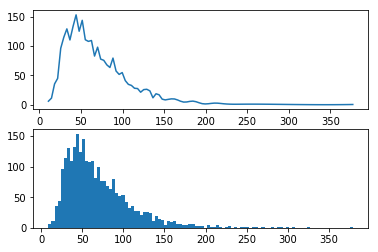

In [34]:
n=100
s=mat['subsamp_se_ftrs'][0,:]
p, x = np.histogram(s, bins=n) # bin it into n = N/10 bins
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x, p, s=n)

plt.figure(2)
plt.subplot(2,1,1)
plt.plot(x, f(x))

plt.subplot(2,1,2)
plt.hist(s,n);

Min # of time samples 171


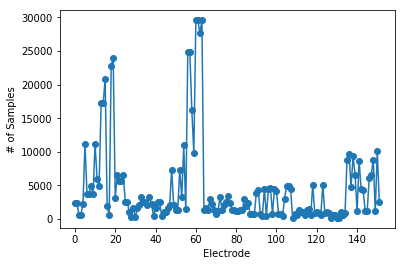

In [31]:
# Plot # of time windows per electrode
plt.figure(1)
plt.clf()
plt.plot(n_wind,'o-')
plt.xlabel('Electrode')
plt.ylabel('# of Samples')

print('Min # of time samples %d' % np.min(n_wind))